# __Modelo de función: regresión lineal polinómica simple__

In [1]:
#Apretar B para agregar una celda abajo, A para agregar una celda arriba, y D dos veces consecutivas para eliminar una celda.

In [1]:
#Librería de C++ que resuelve Cuadrados Mínimos Lineales, y además provee RMSE y NRMSE
import CML
#Para crear matrices e interfacear con Eigen en C++
import numpy as np
#Para hacer los gráficos
import matplotlib.pyplot as plt
#Para crear dataframes y almacenar los datos.
import pandas as pd
#Para cargar los datos desde archivos de texto
import pickle

In [2]:
#Cargo los OTPs diarios para cada año relevante
with open('otpPorDia1990.txt', 'rb') as f:
    otpDia90 = pickle.load(f)
with open('otpPorDia1991.txt', 'rb') as f:
    otpDia91 = pickle.load(f)
with open('otpPorDia1992.txt', 'rb') as f:
    otpDia92 = pickle.load(f)
with open('otpPorDia1993.txt', 'rb') as f:
    otpDia93 = pickle.load(f)
with open('otpPorDia1994.txt', 'rb') as f:
    otpDia94 = pickle.load(f)
with open('otpPorDia1995.txt', 'rb') as f:
    otpDia95 = pickle.load(f)
with open('otpPorDia1996.txt', 'rb') as f:
    otpDia96 = pickle.load(f)
with open('otpPorDia2002.txt', 'rb') as f:
    otpDia02 = pickle.load(f)
with open('otpPorDia2003.txt', 'rb') as f:
    otpDia03 = pickle.load(f)
with open('otpPorDia2004.txt', 'rb') as f:
    otpDia04 = pickle.load(f)
with open('otpPorDia2005.txt', 'rb') as f:
    otpDia05 = pickle.load(f)
with open('otpPorDia2006.txt', 'rb') as f:
    otpDia06 = pickle.load(f)
with open('otpPorDia2007.txt', 'rb') as f:
    otpDia07 = pickle.load(f)
with open('otpPorDia2008.txt', 'rb') as f:
    otpDia08 = pickle.load(f)

# __Regresión simple polinómica. Datos: 1990-1993. Predicción: 1994-1996.__

In [ ]:
%%time
#Valores de las variables
xis = [np.arange(1,366),np.arange(1,731),np.arange(1,1096),np.arange(1,1461),np.arange(1,1461)]
xitest = np.arange(1,2556)

#Vamos a hacer regresión lineal tomando como datos los años [1993],[1992,1993],[1991,1992,1993],[1990,1991,1992,1993]
yis = [otpDia93, np.concatenate([otpDia92,otpDia93]), np.concatenate([otpDia91,otpDia92,otpDia93]), np.concatenate([otpDia90,otpDia91,otpDia92,otpDia93])]
yitest = np.concatenate([otpDia90,otpDia91,otpDia92,otpDia93,otpDia94,otpDia95,otpDia96])
sols = []
aprox = []

rangoGrado = [range(501),range(501),range(1001),range(1001)]
errorPorGrado = [[],[],[],[]]

for i in range(4):
    A = np.stack([xis[i]**j for j in rangoGrado[i]], axis=1)
    for g in rangoGrado[i]:
        #print("Aproximando con polinomio de grado "+str(g)+":")
        Atemp = A[:,:g+1]
    
        #Resolver CML
        sol = CML.resolver(Atemp,yis[i])
        #print("\tCoeficientes solución:", sol)
    
        #Calculo NRMSE
        error = CML.NRMSE(Atemp,sol,yis[i])
        errorPorGrado[i].append(error)
        #print("\tError en la solución:", error)
    print("Error mínimo hallado con i="+str(i)+": " + str(np.min(errorPorGrado[i])) + " (con un polinomio de grado " + str(np.argmin(errorPorGrado[i])) + ")")

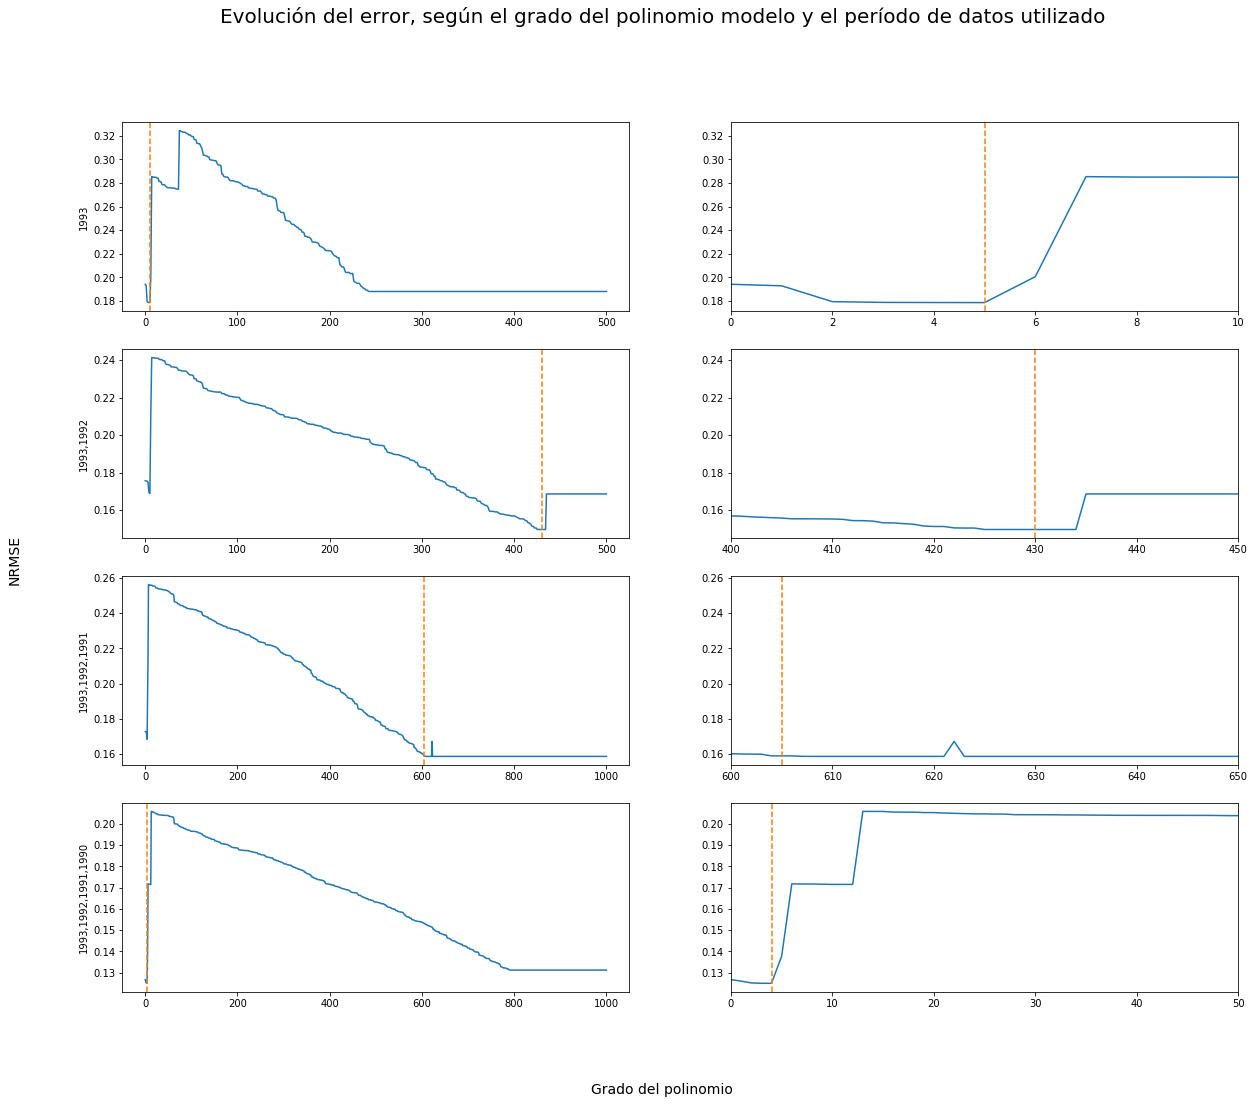

In [8]:
fig, axs = plt.subplots(4,2, figsize=(20,16))
fig.text(0.5,0.04, "Grado del polinomio", ha="center", va="center", fontsize=14)
fig.text(0.05,0.5, "NRMSE", ha="center", va="center", rotation=90, fontsize=14)
fig.suptitle("Evolución del error, según el grado del polinomio modelo y el período de datos utilizado", fontsize = 20)

axs[0,0].plot(errorPorGrado[0])
axs[0,0].set_ylabel("1993")
axs[0,0].axvline(x = 5, linestyle = '--', color = 'tab:orange')
axs[0,1].set_xlim(left=0,right=10)
axs[0,1].plot(errorPorGrado[0])
axs[0,1].axvline(x = 5, linestyle = '--', color = 'tab:orange')

axs[1,0].plot(errorPorGrado[1])
axs[1,0].set_ylabel("1993,1992")
axs[1,0].axvline(x = 430, linestyle = '--', color = 'tab:orange')
axs[1,1].set_xlim(left=400,right=450)
axs[1,1].plot(errorPorGrado[1])
axs[1,1].axvline(x = 430, linestyle = '--', color = 'tab:orange')

axs[2,0].plot(errorPorGrado[2])
axs[2,0].set_ylabel("1993,1992,1991")
axs[2,0].axvline(x = 605, linestyle = '--', color = 'tab:orange')
axs[2,1].set_xlim(left=600,right=650)
axs[2,1].plot(errorPorGrado[2])
axs[2,1].axvline(x = 605, linestyle = '--', color = 'tab:orange')

axs[3,0].plot(errorPorGrado[3])
axs[3,0].set_ylabel("1993,1992,1991,1990")
axs[3,0].axvline(x = 4, linestyle = '--', color = 'tab:orange')
axs[3,1].set_xlim(left=0,right=50)
axs[3,1].plot(errorPorGrado[3])
axs[3,1].axvline(x = 4, linestyle = '--', color = 'tab:orange')

fig.savefig('convergenciaErrorSLRPoli90s.png')

In [3]:
%%time
#Valores de las variables
xis = [np.arange(1,366),np.arange(1,731),np.arange(1,1096),np.arange(1,1461),np.arange(1,1461)]
xitest = np.arange(1,2556)

#Vamos a hacer regresión lineal tomando como datos los años [1993],[1992,1993],[1991,1992,1993],[1990,1991,1992,1993]
yis = [otpDia93, np.concatenate([otpDia92,otpDia93]), np.concatenate([otpDia91,otpDia92,otpDia93]), np.concatenate([otpDia90,otpDia91,otpDia92,otpDia93])]
yitest = np.concatenate([otpDia90,otpDia91,otpDia92,otpDia93,otpDia94,otpDia95,otpDia96])
sols = []
aprox = []

#Valores de las imágenes a predecir
#Ignoramos los valores óptimos hallados (en el caso del primer y cuarto gráfico); si bien producen menor NRMSE, es claro que no se ajustan mejor a los datos.
gOptUno = 250
gOptDos = 430
gOptTres = 605
gOptCuatro = 810

AUno = np.stack([xis[0]**j for j in range(gOptUno)], axis=1)
ADos = np.stack([xis[1]**j for j in range(gOptDos)], axis=1)
ATres = np.stack([xis[2]**j for j in range(gOptTres)], axis=1)
ACuatro = np.stack([xis[3]**j for j in range(gOptCuatro)], axis=1)

#Resolver CML
sol1 = CML.resolver(AUno,yis[0])
sol2 = CML.resolver(ADos,yis[1])
sol3 = CML.resolver(ATres,yis[2])
sol4 = CML.resolver(ACuatro,yis[3])

Atest1 = np.stack([np.arange(1,365*4)**j for j in range(gOptUno)], axis=1)
Atest2 = np.stack([np.arange(1,365*5)**j for j in range(gOptDos)], axis=1)
Atest3 = np.stack([np.arange(1,365*6)**j for j in range(gOptTres)], axis=1)
Atest4 = np.stack([np.arange(1,365*7)**j for j in range(gOptCuatro)], axis=1)

#Aproximaciones
aprox.append(Atest1@sol1)
aprox.append(Atest2@sol2)
aprox.append(Atest3@sol3)
aprox.append(Atest4@sol4)

CPU times: user 3.08 s, sys: 266 ms, total: 3.34 s
Wall time: 3.32 s


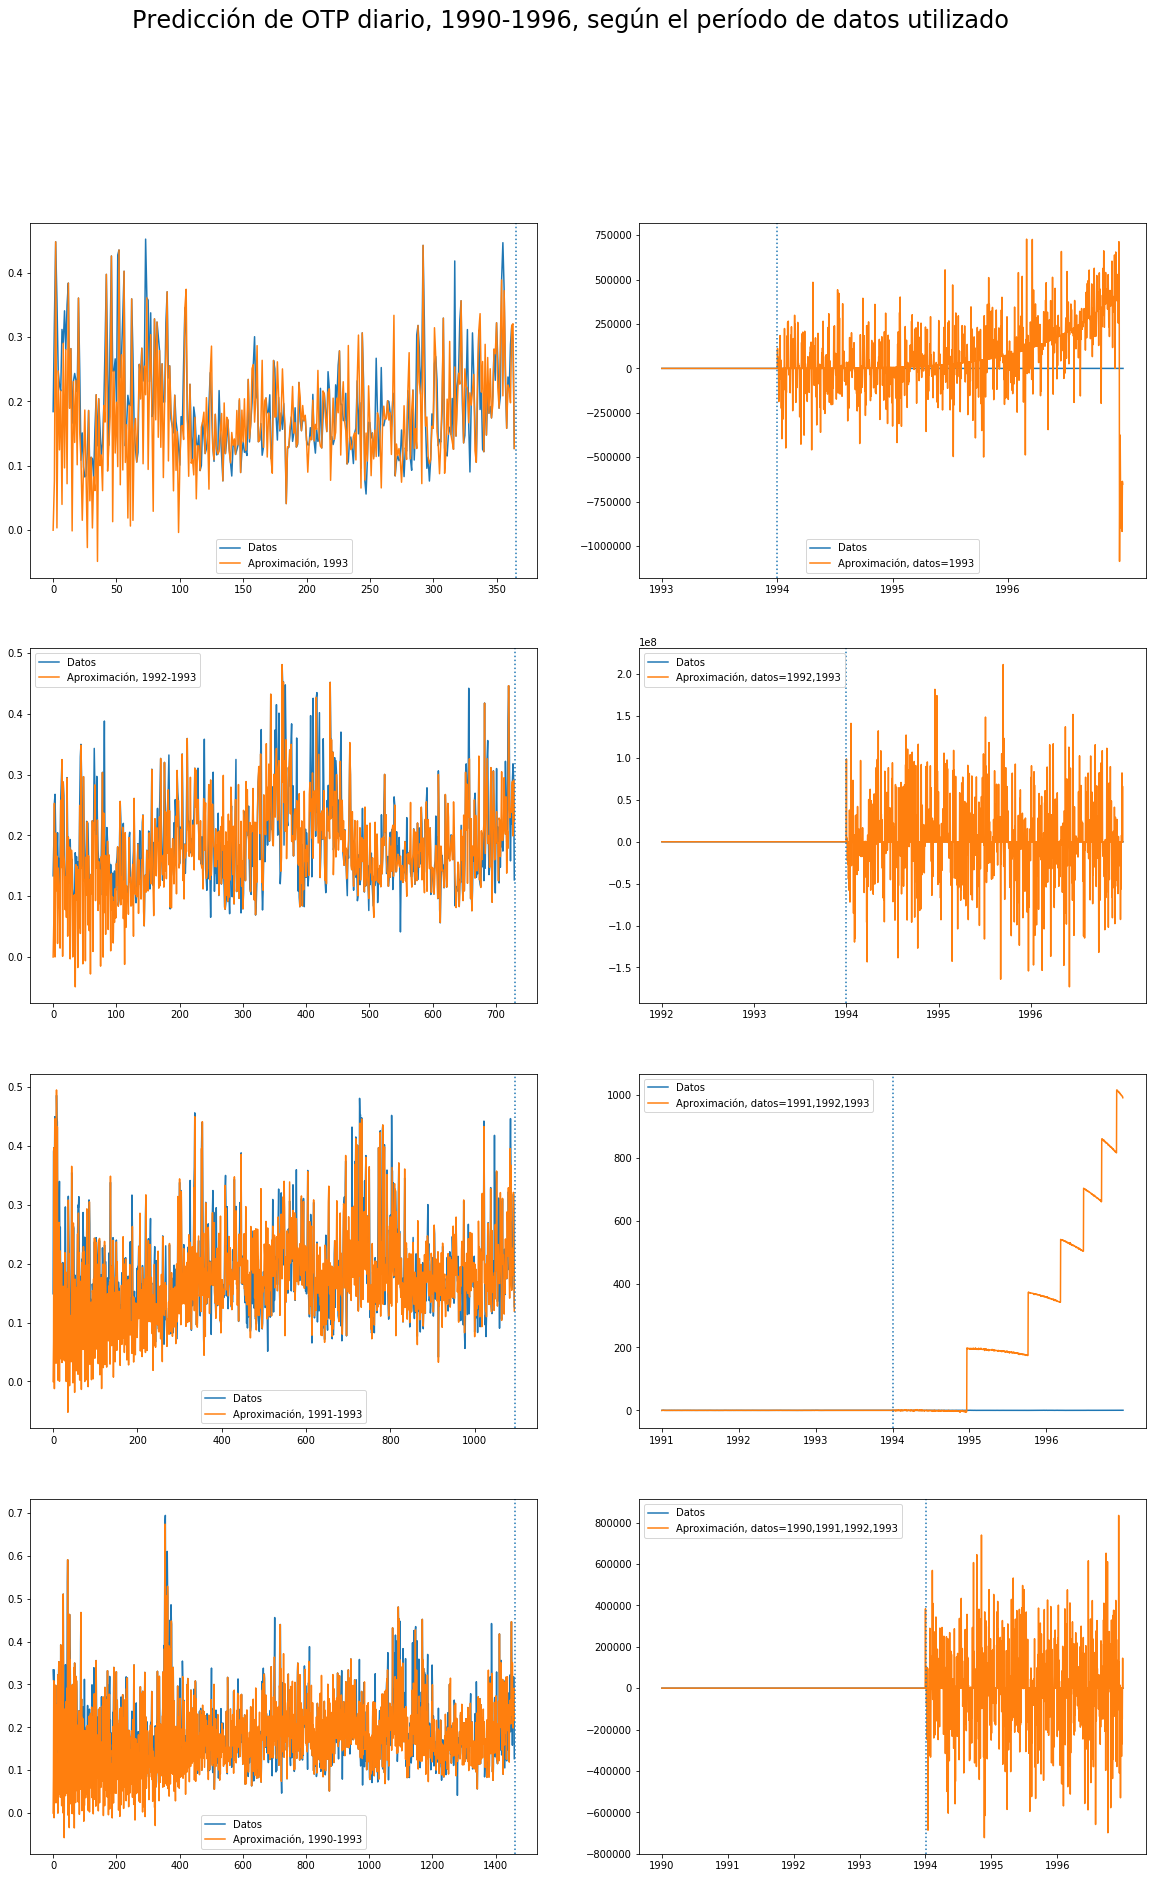

In [4]:
fig, axs = plt.subplots(4,2, figsize=(20,30))
fig.suptitle("Predicción de OTP diario, 1990-1996, según el período de datos utilizado", fontsize=24)

axs[0,0].plot(yis[0], label="Datos")
axs[0,0].plot(aprox[0][:365], label="Aproximación, 1993")
axs[0,0].axvline(x=365,linestyle=":")
axs[0,0].legend()
axs[0,1].set_xticks([365*i for i in range(8)])
axs[0,1].set_xticklabels(['1990','1991','1992','1993','1994','1995','1996'])
axs[0,1].plot(np.concatenate([otpDia93,otpDia94,otpDia95,otpDia96]), label="Datos")
axs[0,1].plot(aprox[0], label="Aproximación, datos=1993")
axs[0,1].axvline(x=365,linestyle=":")
axs[0,1].legend()
axs[0,1].set_xticks([365*i for i in range(4)])
axs[0,1].set_xticklabels(['1993','1994','1995','1996'])

axs[1,0].plot(yis[1], label="Datos")
axs[1,0].plot(aprox[1][:730], label="Aproximación, 1992-1993")
axs[1,0].axvline(x=730,linestyle=":")
axs[1,0].legend()
axs[1,1].plot(np.concatenate([otpDia92,otpDia93,otpDia94,otpDia95,otpDia96]), label="Datos")
axs[1,1].plot(aprox[1], label = "Aproximación, datos=1992,1993")
axs[1,1].axvline(x=730,linestyle=":")
axs[1,1].set_xticks([365*i for i in range(5)])
axs[1,1].set_xticklabels(['1992','1993','1994','1995','1996'])
axs[1,1].legend()

axs[2,0].plot(yis[2], label="Datos")
axs[2,0].plot(aprox[2][:1095], label="Aproximación, 1991-1993")
axs[2,0].axvline(x=1095,linestyle=":")
axs[2,0].legend()
axs[2,1].plot(np.concatenate([otpDia91,otpDia92,otpDia93,otpDia94,otpDia95,otpDia96]), label="Datos")
axs[2,1].plot(aprox[2], label = "Aproximación, datos=1991,1992,1993")
axs[2,1].axvline(x=1095,linestyle=":")
axs[2,1].set_xticks([365*i for i in range(6)])
axs[2,1].set_xticklabels(['1991','1992','1993','1994','1995','1996'])
axs[2,1].legend()

axs[3,0].plot(yis[3], label="Datos")
axs[3,0].plot(aprox[3][:1460], label="Aproximación, 1990-1993")
axs[3,0].axvline(x=1461,linestyle=":")
axs[3,0].legend()
axs[3,1].plot(np.concatenate([otpDia90,otpDia91,otpDia92,otpDia93,otpDia94,otpDia95,otpDia96]), label="Datos")
axs[3,1].plot(aprox[3], label = "Aproximación, datos=1990,1991,1992,1993")
axs[3,1].axvline(x=1461,linestyle=":")
axs[3,1].set_xticks([365*i for i in range(7)])
axs[3,1].set_xticklabels(['1990','1991','1992','1993','1994','1995','1996'])
axs[3,1].legend()

fig.savefig('prediccionSLRpolimuchogrado.png')

In [ ]:
%%time
#Valores de las variables
xis = [np.arange(1,366),np.arange(1,731),np.arange(1,1096),np.arange(1,1461),np.arange(1,1461)]
xitest = np.arange(1,2556)

#Vamos a hacer regresión lineal tomando como datos los años [1993],[1992,1993],[1991,1992,1993],[1990,1991,1992,1993]
yis = [otpDia93, np.concatenate([otpDia92,otpDia93]), np.concatenate([otpDia91,otpDia92,otpDia93]), np.concatenate([otpDia90,otpDia91,otpDia92,otpDia93])]
yitest = np.concatenate([otpDia90,otpDia91,otpDia92,otpDia93,otpDia94,otpDia95,otpDia96])
sols = []
aprox = []

#Valores de las imágenes a predecir
#Ignoramos los valores óptimos hallados (en el caso del primer y cuarto gráfico); si bien producen menor NRMSE, es claro que no se ajustan mejor a los datos.
gOptUno = 5
gOptDos = 5
gOptTres = 5
gOptCuatro = 4

AUno = np.stack([xis[0]**j for j in range(gOptUno)], axis=1)
ADos = np.stack([xis[1]**j for j in range(gOptDos)], axis=1)
ATres = np.stack([xis[2]**j for j in range(gOptTres)], axis=1)
ACuatro = np.stack([xis[3]**j for j in range(gOptCuatro)], axis=1)

#Resolver CML
sol1 = CML.resolver(AUno,yis[0])
sol2 = CML.resolver(ADos,yis[1])
sol3 = CML.resolver(ATres,yis[2])
sol4 = CML.resolver(ACuatro,yis[3])

Atest1 = np.stack([xitest**j for j in range(gOptUno)], axis=1)
Atest2 = np.stack([xitest**j for j in range(gOptDos)], axis=1)
Atest3 = np.stack([xitest**j for j in range(gOptTres)], axis=1)
Atest4 = np.stack([xitest**j for j in range(gOptCuatro)], axis=1)

#Aproximaciones
aprox.append(Atest1@sol1)
aprox.append(Atest2@sol2)
aprox.append(Atest3@sol3)
aprox.append(Atest4@sol4)

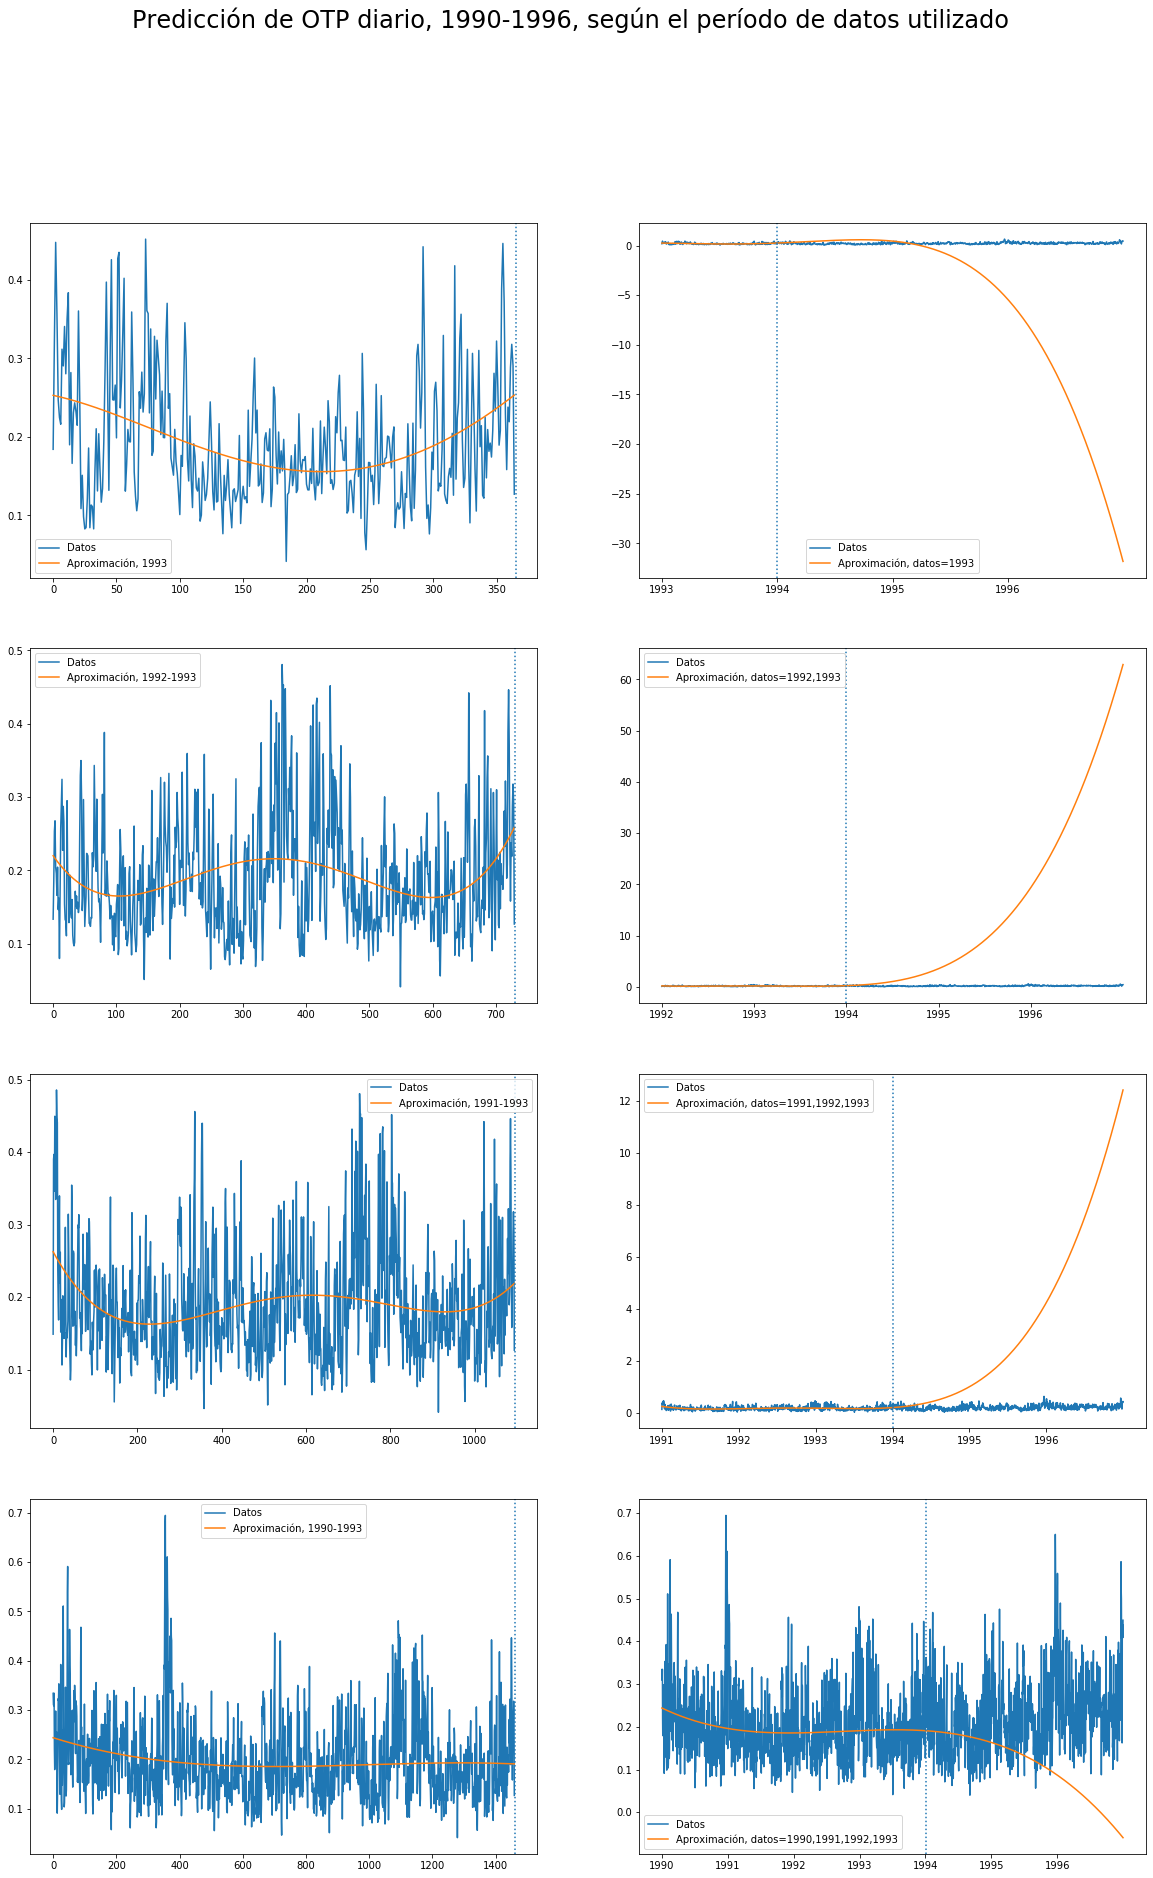

In [27]:
fig, axs = plt.subplots(4,2, figsize=(20,30))
fig.suptitle("Predicción de OTP diario, 1990-1996, según el período de datos utilizado", fontsize=24)

axs[0,0].plot(yis[0], label="Datos")
axs[0,0].plot(aprox[0][:365], label="Aproximación, 1993")
axs[0,0].axvline(x=365,linestyle=":")
axs[0,0].legend()
axs[0,1].set_xticks([365*i for i in range(8)])
axs[0,1].set_xticklabels(['1990','1991','1992','1993','1994','1995','1996'])
axs[0,1].plot(np.concatenate([otpDia93,otpDia94,otpDia95,otpDia96]), label="Datos")
axs[0,1].plot(aprox[0][:365*4], label="Aproximación, datos=1993")
axs[0,1].axvline(x=365,linestyle=":")
axs[0,1].legend()
axs[0,1].set_xticks([365*i for i in range(4)])
axs[0,1].set_xticklabels(['1993','1994','1995','1996'])

axs[1,0].plot(yis[1], label="Datos")
axs[1,0].plot(aprox[1][:730], label="Aproximación, 1992-1993")
axs[1,0].axvline(x=730,linestyle=":")
axs[1,0].legend()
axs[1,1].plot(np.concatenate([otpDia92,otpDia93,otpDia94,otpDia95,otpDia96]), label="Datos")
axs[1,1].plot(aprox[1][:365*5], label = "Aproximación, datos=1992,1993")
axs[1,1].axvline(x=730,linestyle=":")
axs[1,1].set_xticks([365*i for i in range(5)])
axs[1,1].set_xticklabels(['1992','1993','1994','1995','1996'])
axs[1,1].legend()

axs[2,0].plot(yis[2], label="Datos")
axs[2,0].plot(aprox[2][:1095], label="Aproximación, 1991-1993")
axs[2,0].axvline(x=1095,linestyle=":")
axs[2,0].legend()
axs[2,1].plot(np.concatenate([otpDia91,otpDia92,otpDia93,otpDia94,otpDia95,otpDia96]), label="Datos")
axs[2,1].plot(aprox[2][:365*6], label = "Aproximación, datos=1991,1992,1993")
axs[2,1].axvline(x=1095,linestyle=":")
axs[2,1].set_xticks([365*i for i in range(6)])
axs[2,1].set_xticklabels(['1991','1992','1993','1994','1995','1996'])
axs[2,1].legend()

axs[3,0].plot(yis[3], label="Datos")
axs[3,0].plot(aprox[3][:1460], label="Aproximación, 1990-1993")
axs[3,0].axvline(x=1461,linestyle=":")
axs[3,0].legend()
axs[3,1].plot(np.concatenate([otpDia90,otpDia91,otpDia92,otpDia93,otpDia94,otpDia95,otpDia96]), label="Datos")
axs[3,1].plot(aprox[3][:365*7], label = "Aproximación, datos=1990,1991,1992,1993")
axs[3,1].axvline(x=1461,linestyle=":")
axs[3,1].set_xticks([365*i for i in range(7)])
axs[3,1].set_xticklabels(['1990','1991','1992','1993','1994','1995','1996'])
axs[3,1].legend()

fig.savefig('prediccionSLRpolipocogrado2.png')

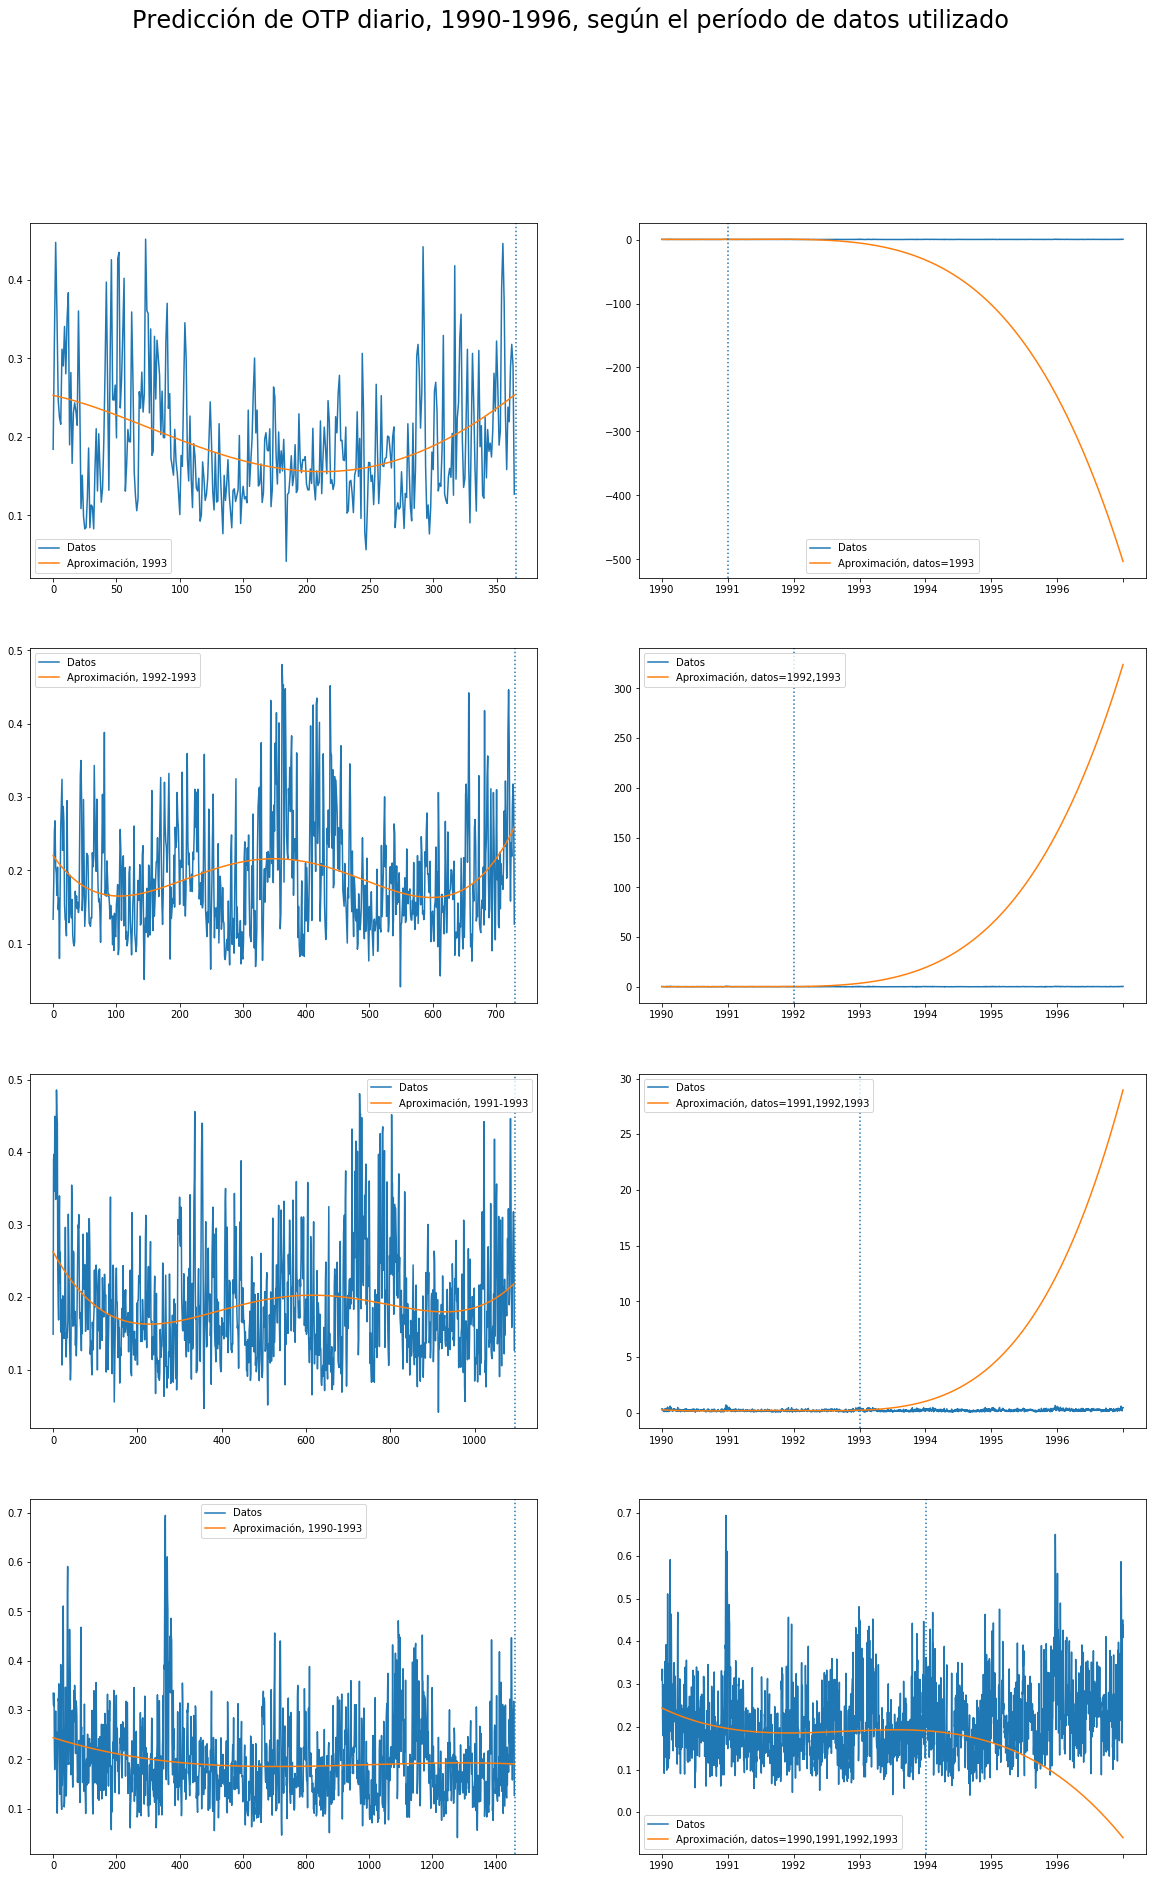

In [14]:
fig, axs = plt.subplots(4,2, figsize=(20,30))
fig.suptitle("Predicción de OTP diario, 1990-1996, según el período de datos utilizado", fontsize=24)

axs[0,0].plot(yis[0], label="Datos")
axs[0,0].plot(aprox[0][:365], label="Aproximación, 1993")
axs[0,0].axvline(x=365,linestyle=":")
axs[0,0].legend()
axs[0,1].set_xticks([365*i for i in range(8)])
axs[0,1].set_xticklabels(['1990','1991','1992','1993','1994','1995','1996'])
axs[0,1].plot(yitest, label="Datos")
axs[0,1].plot(aprox[0], label="Aproximación, datos=1993")
axs[0,1].axvline(x=365,linestyle=":")
axs[0,1].legend()
axs[0,1].set_xticks([365*i for i in range(8)])
axs[0,1].set_xticklabels(['1990','1991','1992','1993','1994','1995','1996'])

axs[1,0].plot(yis[1], label="Datos")
axs[1,0].plot(aprox[1][:730], label="Aproximación, 1992-1993")
axs[1,0].axvline(x=730,linestyle=":")
axs[1,0].legend()
axs[1,1].plot(yitest, label="Datos")
axs[1,1].plot(aprox[1], label = "Aproximación, datos=1992,1993")
axs[1,1].axvline(x=730,linestyle=":")
axs[1,1].set_xticks([365*i for i in range(8)])
axs[1,1].set_xticklabels(['1990','1991','1992','1993','1994','1995','1996'])
axs[1,1].legend()

axs[2,0].plot(yis[2], label="Datos")
axs[2,0].plot(aprox[2][:1095], label="Aproximación, 1991-1993")
axs[2,0].axvline(x=1095,linestyle=":")
axs[2,0].legend()
axs[2,1].plot(yitest, label="Datos")
axs[2,1].plot(aprox[2], label = "Aproximación, datos=1991,1992,1993")
axs[2,1].axvline(x=1095,linestyle=":")
axs[2,1].set_xticks([365*i for i in range(8)])
axs[2,1].set_xticklabels(['1990','1991','1992','1993','1994','1995','1996'])
axs[2,1].legend()

axs[3,0].plot(yis[3], label="Datos")
axs[3,0].plot(aprox[3][:1460], label="Aproximación, 1990-1993")
axs[3,0].axvline(x=1461,linestyle=":")
axs[3,0].legend()
axs[3,1].plot(yitest, label="Datos")
axs[3,1].plot(aprox[3], label = "Aproximación, datos=1990,1991,1992,1993")
axs[3,1].axvline(x=1461,linestyle=":")
axs[3,1].set_xticks([365*i for i in range(8)])
axs[3,1].set_xticklabels(['1990','1991','1992','1993','1994','1995','1996'])
axs[3,1].legend()

fig.savefig("prediccionSLRpolipocogrado.png")

# __Regresión simple polinómica. Datos: 2002-2005. Predicción: 2006-2008__

In [9]:
%%time
#Valores de las variables
xis = [np.arange(1,366),np.arange(1,731),np.arange(1,1096),np.arange(1,1461),np.arange(1,1461)]
xitest = np.arange(1,2556)

#Vamos a hacer regresión lineal tomando como datos los años [1993],[1992,1993],[1991,1992,1993],[1990,1991,1992,1993]
yis = [otpDia05, np.concatenate([otpDia04,otpDia05]), np.concatenate([otpDia03,otpDia04,otpDia05]), np.concatenate([otpDia02,otpDia03,otpDia04,otpDia05])]
yitest = np.concatenate([otpDia02,otpDia03,otpDia04,otpDia05,otpDia06,otpDia07,otpDia08])
sols = []
aprox = []

rangoGrado = [range(501),range(501),range(1001),range(1001)]
errorPorGrado = [[],[],[],[]]

for i in range(4):
    A = np.stack([xis[i]**j for j in rangoGrado[i]], axis=1)
    for g in rangoGrado[i]:
        #print("Aproximando con polinomio de grado "+str(g)+":")
        Atemp = A[:,:g+1]
    
        #Resolver CML
        sol = CML.resolver(Atemp,yis[i])
        #print("\tCoeficientes solución:", sol)
    
        #Calculo NRMSE
        error = CML.NRMSE(Atemp,sol,yis[i])
        errorPorGrado[i].append(error)
        #print("\tError en la solución:", error)
    print("Error mínimo hallado con i="+str(i)+": " + str(np.min(errorPorGrado[i])) + " (con un polinomio de grado " + str(np.argmin(errorPorGrado[i])) + ")")

Error mínimo hallado con i=0: 0.18700867493955167 (con un polinomio de grado 5)
Error mínimo hallado con i=1: 0.1540100086187142 (con un polinomio de grado 427)
Error mínimo hallado con i=2: 0.13769767999173513 (con un polinomio de grado 885)
Error mínimo hallado con i=3: 0.1489755270576645 (con un polinomio de grado 979)
CPU times: user 27min 46s, sys: 1.67 s, total: 27min 48s
Wall time: 28min 35s


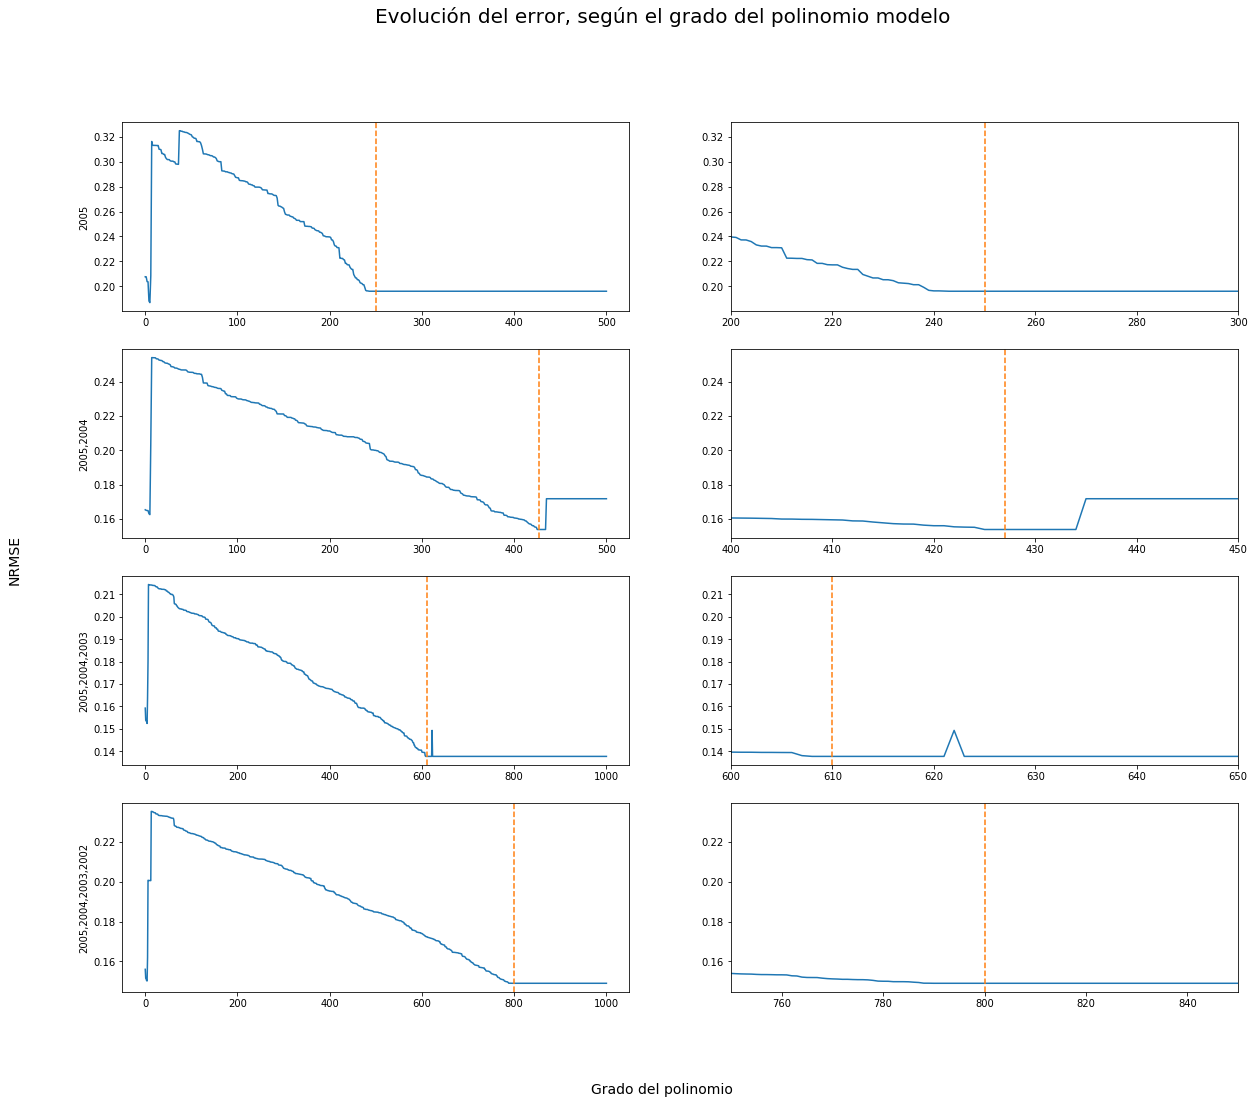

In [10]:
fig, axs = plt.subplots(4,2, figsize=(20,16))
fig.text(0.5,0.04, "Grado del polinomio", ha="center", va="center", fontsize=14)
fig.text(0.05,0.5, "NRMSE", ha="center", va="center", rotation=90, fontsize=14)
fig.suptitle("Evolución del error, según el grado del polinomio modelo", fontsize = 20)

axs[0,0].plot(errorPorGrado[0])
axs[0,0].set_ylabel("2005")
axs[0,0].axvline(x = 250, linestyle = '--', color = 'tab:orange')
axs[0,1].set_xlim(left=200,right=300)
axs[0,1].plot(errorPorGrado[0])
axs[0,1].axvline(x = 250, linestyle = '--', color = 'tab:orange')

axs[1,0].plot(errorPorGrado[1])
axs[1,0].set_ylabel("2005,2004")
axs[1,0].axvline(x = 427, linestyle = '--', color = 'tab:orange')
axs[1,1].set_xlim(left=400,right=450)
axs[1,1].plot(errorPorGrado[1])
axs[1,1].axvline(x = 427, linestyle = '--', color = 'tab:orange')

axs[2,0].plot(errorPorGrado[2])
axs[2,0].set_ylabel("2005,2004,2003")
axs[2,0].axvline(x = 610, linestyle = '--', color = 'tab:orange')
axs[2,1].set_xlim(left=600,right=650)
axs[2,1].plot(errorPorGrado[2])
axs[2,1].axvline(x = 610, linestyle = '--', color = 'tab:orange')

axs[3,0].plot(errorPorGrado[3])
axs[3,0].set_ylabel("2005,2004,2003,2002")
axs[3,0].axvline(x = 800, linestyle = '--', color = 'tab:orange')
axs[3,1].set_xlim(left=750,right=850)
axs[3,1].plot(errorPorGrado[3])
axs[3,1].axvline(x = 800, linestyle = '--', color = 'tab:orange')

fig.savefig('convergenciaErrorSLRPoli00s.png')

In [31]:
%%time
#Valores de las variables
xis = [np.arange(1,366),np.arange(1,731),np.arange(1,1096),np.arange(1,1461),np.arange(1,1461)]
xitest = np.arange(1,2556)

#Vamos a hacer regresión lineal tomando como datos los años [1993],[1992,1993],[1991,1992,1993],[1990,1991,1992,1993]
yis = [otpDia05, np.concatenate([otpDia04,otpDia05]), np.concatenate([otpDia03,otpDia04,otpDia05]), np.concatenate([otpDia02,otpDia03,otpDia04,otpDia05])]
yitest = np.concatenate([otpDia02,otpDia03,otpDia04,otpDia05,otpDia06,otpDia07,otpDia08])
sols = []
aprox = []

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 406 µs


In [32]:
#Valores de las imágenes a predecir
#Ignoramos los valores óptimos hallados (en el caso del primer y cuarto gráfico); si bien producen menor NRMSE, es claro que no se ajustan mejor a los datos.
gOptUno = 250
gOptDos = 427
gOptTres = 610
gOptCuatro = 800

AUno = np.stack([xis[0]**j for j in range(gOptUno)], axis=1)
ADos = np.stack([xis[1]**j for j in range(gOptDos)], axis=1)
ATres = np.stack([xis[2]**j for j in range(gOptTres)], axis=1)
ACuatro = np.stack([xis[3]**j for j in range(gOptCuatro)], axis=1)

#Resolver CML
sol1 = CML.resolver(AUno,yis[0])
sol2 = CML.resolver(ADos,yis[1])
sol3 = CML.resolver(ATres,yis[2])
sol4 = CML.resolver(ACuatro,yis[3])

Atest1 = np.stack([xitest**j for j in range(gOptUno)], axis=1)
Atest2 = np.stack([xitest**j for j in range(gOptDos)], axis=1)
Atest3 = np.stack([xitest**j for j in range(gOptTres)], axis=1)
Atest4 = np.stack([xitest**j for j in range(gOptCuatro)], axis=1)

#Aproximaciones
aprox.append(Atest1@sol1)
aprox.append(Atest2@sol2)
aprox.append(Atest3@sol3)
aprox.append(Atest4@sol4)

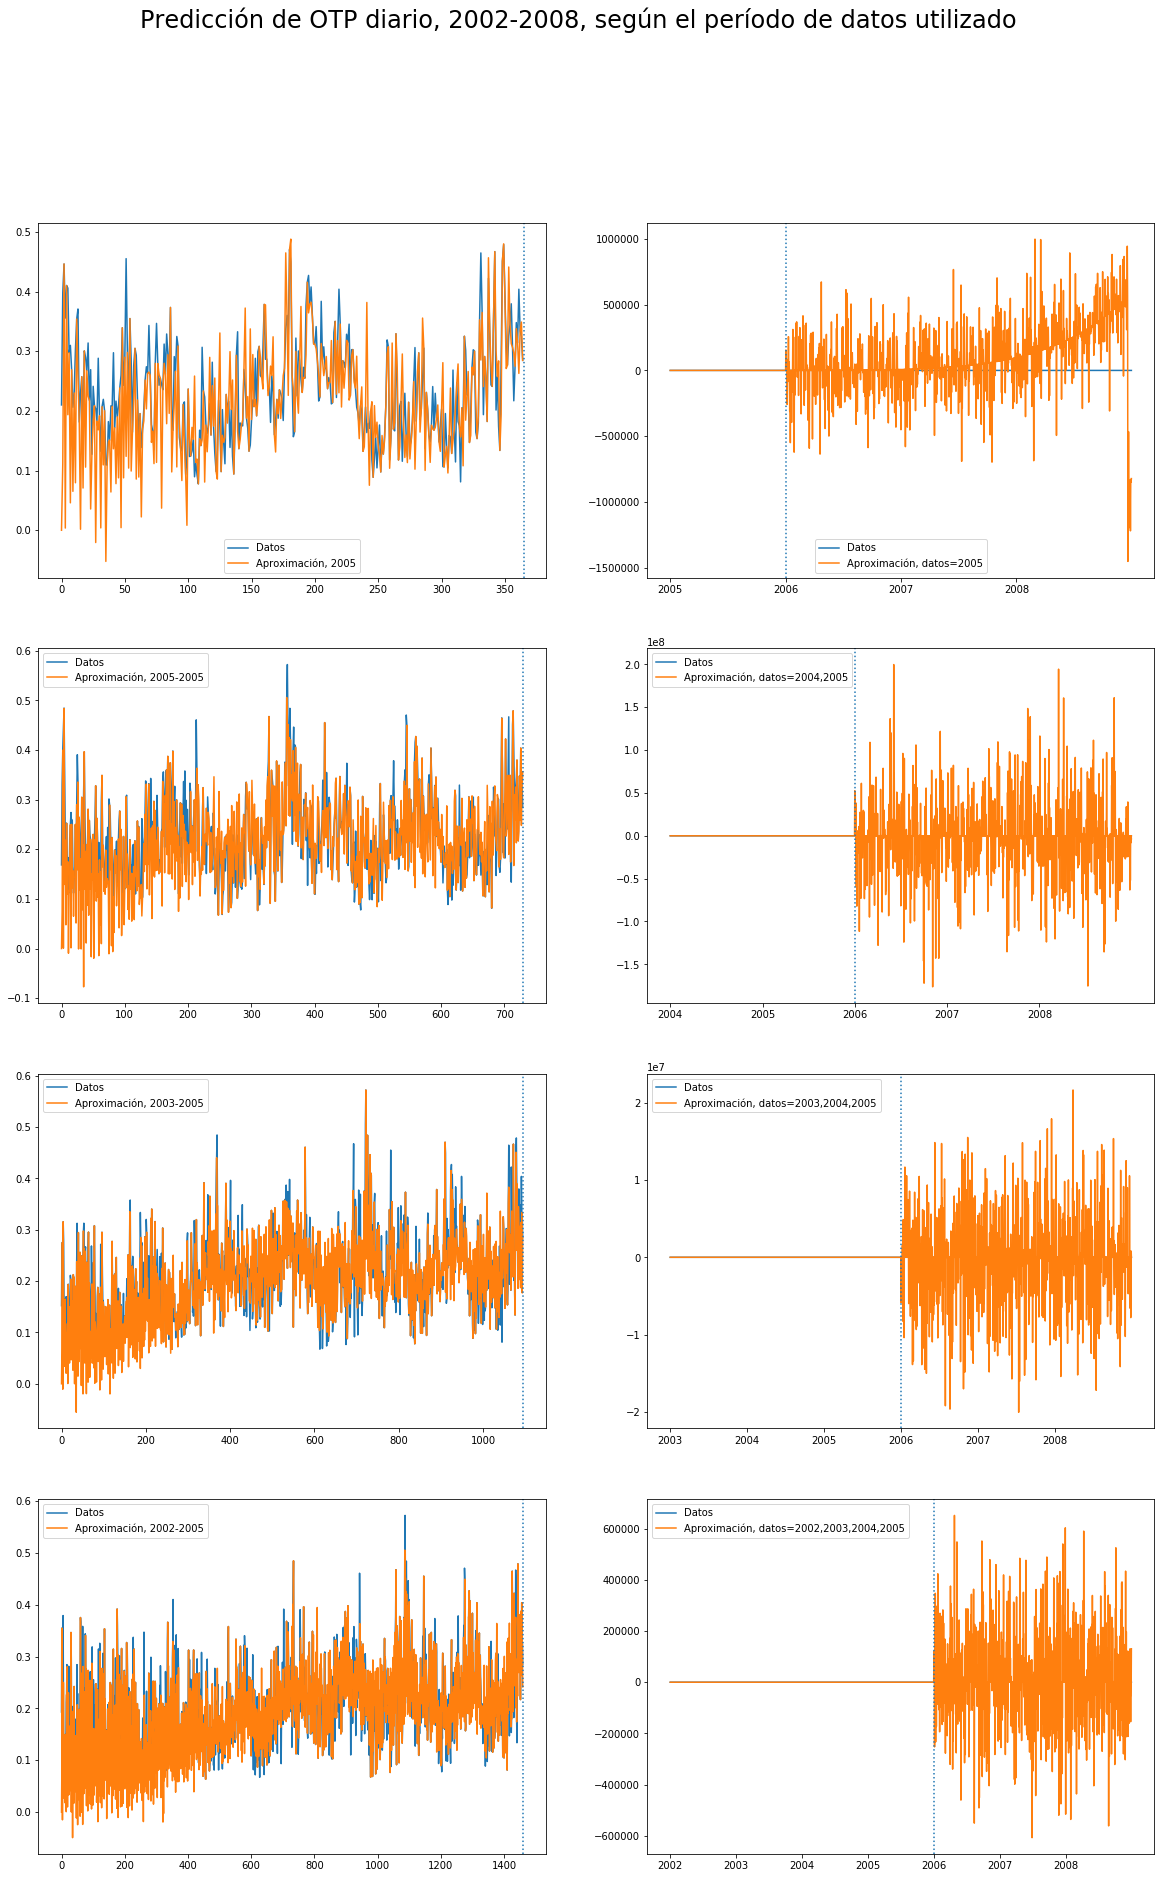

In [35]:
fig, axs = plt.subplots(4,2, figsize=(20,30))
fig.suptitle("Predicción de OTP diario, 2002-2008, según el período de datos utilizado", fontsize=24)

axs[0,0].plot(yis[0], label="Datos")
axs[0,0].plot(aprox[0][:365], label="Aproximación, 2005")
axs[0,0].axvline(x=365,linestyle=":")
axs[0,0].legend()
axs[0,1].set_xticks([365*i for i in range(8)])
axs[0,1].set_xticklabels(['2002','2003','2004','2005','2006','2007','2008'])
axs[0,1].plot(np.concatenate([otpDia05,otpDia06,otpDia07,otpDia08]), label="Datos")
axs[0,1].plot(aprox[0][:365*4], label="Aproximación, datos=2005")
axs[0,1].axvline(x=365,linestyle=":")
axs[0,1].legend()
axs[0,1].set_xticks([365*i for i in range(4)])
axs[0,1].set_xticklabels(['2005','2006','2007','2008'])

axs[1,0].plot(yis[1], label="Datos")
axs[1,0].plot(aprox[1][:730], label="Aproximación, 2005-2005")
axs[1,0].axvline(x=730,linestyle=":")
axs[1,0].legend()
axs[1,1].plot(np.concatenate([otpDia04,otpDia05,otpDia06,otpDia07,otpDia08]), label="Datos")
axs[1,1].plot(aprox[1][:365*5], label = "Aproximación, datos=2004,2005")
axs[1,1].axvline(x=730,linestyle=":")
axs[1,1].set_xticks([365*i for i in range(5)])
axs[1,1].set_xticklabels(['2004','2005','2006','2007','2008'])
axs[1,1].legend()

axs[2,0].plot(yis[2], label="Datos")
axs[2,0].plot(aprox[2][:1095], label="Aproximación, 2003-2005")
axs[2,0].axvline(x=1095,linestyle=":")
axs[2,0].legend()
axs[2,1].plot(np.concatenate([otpDia03,otpDia04,otpDia05,otpDia06,otpDia07,otpDia08]), label="Datos")
axs[2,1].plot(aprox[2][:365*6], label = "Aproximación, datos=2003,2004,2005")
axs[2,1].axvline(x=1095,linestyle=":")
axs[2,1].set_xticks([365*i for i in range(6)])
axs[2,1].set_xticklabels(['2003','2004','2005','2006','2007','2008'])
axs[2,1].legend()

axs[3,0].plot(yis[3], label="Datos")
axs[3,0].plot(aprox[3][:1460], label="Aproximación, 2002-2005")
axs[3,0].axvline(x=1461,linestyle=":")
axs[3,0].legend()
axs[3,1].plot(np.concatenate([otpDia02,otpDia03,otpDia04,otpDia05,otpDia06,otpDia07,otpDia08]), label="Datos")
axs[3,1].plot(aprox[3], label = "Aproximación, datos=2002,2003,2004,2005")
axs[3,1].axvline(x=1461,linestyle=":")
axs[3,1].set_xticks([365*i for i in range(7)])
axs[3,1].set_xticklabels(['2002','2003','2004','2005','2006','2007','2008'])
axs[3,1].legend()

fig.savefig("prediccionSLRpolimuchogrado00s.png")

# __Está claro que, si bien un modelo polinómico produce una reconstrucción razonablemente fiel de los datos a los que se ajusta, su poder de predicción es paupérrimo: el hecho de que la función sea un polinomio de alto grado produce un comportamiento errático cuando se la evalúa en años posteriores, y por lo tanto este modelo no constituye una buena herramienta de pronóstico.__